In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from scipy.ndimage import gaussian_filter1d as smooth

from my_stats import get_r2

In [2]:
T = 5000
x_1 = smooth(np.random.normal(0, 1, T), 10)
x_2 = smooth(np.random.normal(0, 1, T), 10)

x = np.array([x_1, x_2]).T

w = np.array([.5, .5])
y = x @ w + np.random.randn(T)*.1

rgr = Ridge(alpha=.1).fit(x, y)
y_hat = rgr.predict(x)

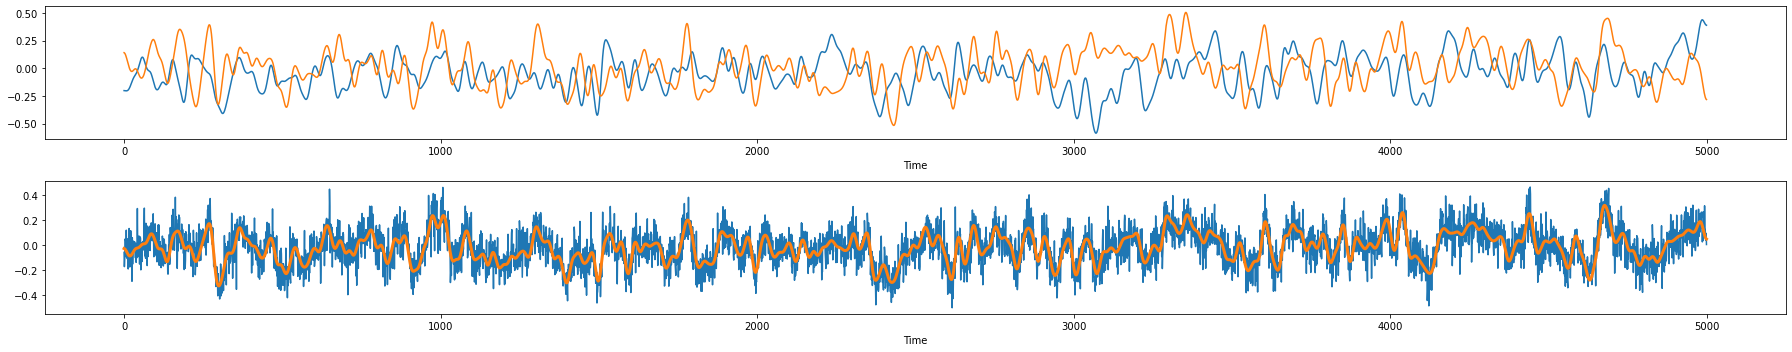

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(25, 5), tight_layout=True)
axs[0].plot(x)
axs[1].plot(y)
axs[1].plot(y_hat, lw=3)

for ax in axs:
    ax.set_xlabel('Time')

In [4]:
NPC = np.arange(1, 3)

for npc in NPC:
    pca = PCA(n_components=npc)
    x_pc = pca.fit_transform(x)
    
    rgr = Ridge(alpha=.1).fit(x_pc, y)
    y_hat = rgr.predict(x_pc)
    
    print(f'{npc} PCs')
    for cpc, expl_var in enumerate(pca.explained_variance_ratio_):
        print(f'Var explained by PC {cpc}: {expl_var:.4f}')
    
    print(f'Prediction R2: {get_r2(y, y_hat)}')

1 PCs
Var explained by PC 0: 0.5582
Prediction R2: 0.17427564655446348
2 PCs
Var explained by PC 0: 0.5582
Var explained by PC 1: 0.4418
Prediction R2: 0.5557339989011167


In [30]:
k = 20
n = 10

xs_all = [x]

for k_ in range(k):
    x_k = smooth(np.random.normal(0, 1, T), 10)
    x_n = np.nan*np.zeros((T, n))
    for i in range(n):
        x_n[:, i] = x_k.copy() + .2*smooth(np.random.normal(0, 1, T), 10)
    
    x_n *= (k-k_)/k
    xs_all.append(x_n)
    
x_hd = np.concatenate(xs_all, axis=1)

rgr_hd = Ridge(alpha=.1).fit(x_hd, y)
y_hat = rgr_hd.predict(x_hd)

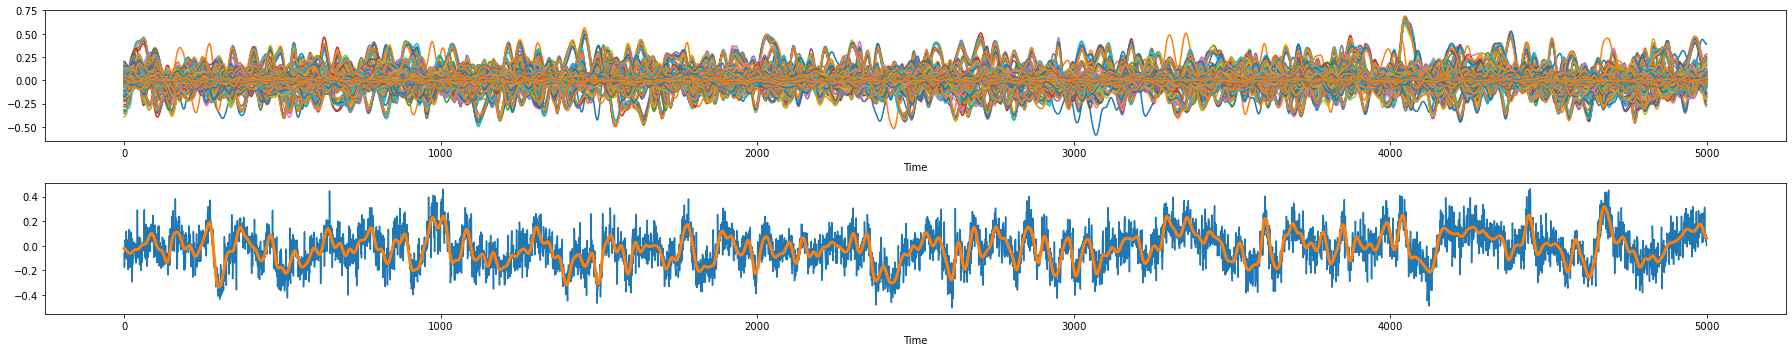

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(25, 5), tight_layout=True)
axs[0].plot(x_hd)
axs[1].plot(y)
axs[1].plot(y_hat, lw=3)

for ax in axs:
    ax.set_xlabel('Time')

In [32]:
NPC = np.arange(1, (k*n+3))

for npc in NPC:
    pca = PCA(n_components=npc)
    x_pc = pca.fit_transform(x_hd)
    
    rgr = Ridge(alpha=.1).fit(x_pc, y)
    y_hat = rgr.predict(x_pc)
    
    print(f'{npc} PCs')
    for cpc, expl_var in enumerate(pca.explained_variance_ratio_):
        print(f'Var explained by PC {cpc}: {expl_var:.4f}')
    
    print(f'Prediction R2: {get_r2(y, y_hat)}')

1 PCs
Var explained by PC 0: 0.1428
Prediction R2: 0.013247211837893347
2 PCs
Var explained by PC 0: 0.1428
Var explained by PC 1: 0.1235
Prediction R2: 0.013983903818658106
3 PCs
Var explained by PC 0: 0.1428
Var explained by PC 1: 0.1235
Var explained by PC 2: 0.1101
Prediction R2: 0.017934901110739476
4 PCs
Var explained by PC 0: 0.1428
Var explained by PC 1: 0.1235
Var explained by PC 2: 0.1101
Var explained by PC 3: 0.1005
Prediction R2: 0.018432836590614232
5 PCs
Var explained by PC 0: 0.1428
Var explained by PC 1: 0.1235
Var explained by PC 2: 0.1101
Var explained by PC 3: 0.1005
Var explained by PC 4: 0.0779
Prediction R2: 0.03242676194142491
6 PCs
Var explained by PC 0: 0.1428
Var explained by PC 1: 0.1235
Var explained by PC 2: 0.1101
Var explained by PC 3: 0.1005
Var explained by PC 4: 0.0779
Var explained by PC 5: 0.0765
Prediction R2: 0.051885673531998244
7 PCs
Var explained by PC 0: 0.1428
Var explained by PC 1: 0.1235
Var explained by PC 2: 0.1101
Var explained by PC 3: 